# Homework 2: Supervised Learning - k-Nearest Neighbor (kNN) Algorithm 

k-Nearest Neighbor (kNN) algorithm uses a simple idea: "you are what your neighbors are". In the first part of the assignment, we will cover some background needed to understand the kNN algorithm. In the second part, you will be asked to apply your knowledge on another data set. 

## Part A: kNN Tutorial with Questions (50% of grade)

Let us start by importing the needed libraries. We will continue using the sklearn library, which implements many of the most popular data science algorithms. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Let us load the Iris data set using a sklearn function `load_iris`.

In [2]:
iris = datasets.load_iris()

As you can see from http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html, `iris` is an object with features `data` (a 150x4 matrix, where $i$-th row are 4 features of the $i$-th flower), `feature_names` (the names of the 4 features), `target` (a vector of length 150, where $i$-th number is the type of the $i$-th flower -- in machine learning people often say "label" instead of "target"), `target_names` (these are strings explaining what each of the 3 types of flowers are), and `DESCR` (giving some information about the Iris data set). Let us list them all 

In [3]:
print(iris.DESCR) 
print(iris.data) 
print(iris.feature_names) 
print(iris.target)
print(iris.target_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

So, we can see that the features of the second flower are `[4.9, 3.0, 1.4, 0.2]`, which means its `sepal_length` is 4.9 cm, `sepal_width` is 3.0 cm, `petal_length` is 1.4 cm, and `petal_width` is 0.2 cm. We will write it matematically as $x_2 = [x_{21}, x_{22}, x_{23}, x_{24}] = [4.9, 3.0, 1.4, 0.2]$. We see that its `target` is 0, which means the type of this iris is `setosa`. We will write it matematically as $y_2 = 0$. All this information was obtained by real botanists who studied iris flowers trying to understand the physical measurements that discriminate between the 3 different types of those flowers.

In machine learning, people like to denote this data set as $D_{Iris} = \{(x_i, y_i), i = 1, 2 ... 150\}$, meaning that data set $D_{Iris}$ is a set of 150 labeled examples $(x_i, y_i)$. An alternative is to write $D_{Iris} = \{X_{Iris}, Y_{Iris}\}$.

### Supervised Learning
Supervised learning is a game with the following objective. You are given the iris data set $D_{Iris}$ where you know 4 features and target values for 150 irises and your objective is to come up with a computer program that predicts a type of any iris flower given the values of its 4 attributes. Written in pseudocode, this is what you have to do:

`predictor = create(algorithm_type, D)
y_new = predictor(x_new)`

In the first line, you are running a `create` function that takes as input data set `D` and the name of a supervised learning algorithm `algorithm_type` and produces as an output a computer program `predictor`. In the second line, you are using `predictor` to predict the label (`y_new` value) for a flower whose features are given by `x_new`.

### kNN Algorithm
kNN is a popular supervised learning algorithm that allows us to create `predictor`. The idea of kNN is that the label of flower `x_new` depends on labels of flowers in its neighborhood. In particular, kNN finds the distance between `x_new` and every example `x` in data set `D`. Then, it looks at the label `y` of k examples which are the closest to `x_new`. The predicted label `y_new` is obtained as the most common label in the group of the k nearest neighbors.

**Parameter choice**. We need to make a few decisions when running kNN. The most important is the choice of `k`. If `k = 1`, then we are looking only at the hearest neighbor and it might not be a good idea if we are dealing with noisy data. If `k` is very large, then we might be counting far neighbors that might have different properties. Other decisions include the choice of distance metric (Euclidean is the standard one) and the choice whether to weight closer neighbors more than the farther ones.

**Accuracy**. When deciding which parameters to pick or which supervised learning algorithm to use (there are popular algorithms other than kNN), the question is how to measure which choice is better. The answer is to check if `predictor` provides accurate prediction. Given a data set `D`, a typical way to check accuracy is to randomly split `D` into two data sets, `D_train` and `D_test`. Then, `predictor` is created/trained using `D_train` data set and its accuracy is checked using `D_test`. In particular, we use `predictor` to predict label of every example from `D_test` and compare it with the true labels. The percentage of the correct guesses on `D_test` is reported as accuracy of `predictor`.

## kNN Demo
The following piece of code is taken from:
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py. Let us run it (it is guaranteed to run with Python 2.7).

C:\Users\Dhruv\AppData\Local\Temp/ipykernel_34304/220418157.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


<Figure size 432x288 with 0 Axes>

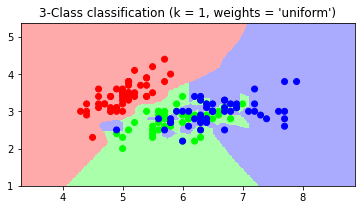

In [4]:
k = 1   # how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

**Question 1.** Change value of k to 3 and observe if there is any difference. Discuss what you see and why.

C:\Users\Dhruv\AppData\Local\Temp/ipykernel_34304/3623045885.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


<Figure size 432x288 with 0 Axes>

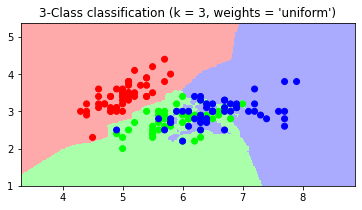

In [5]:
k = 3   # how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

**Answer 1** All point would be at exact same place the difference is the boundaries of each class(change in area of color where next would reside). 
The blue point(5,2,5)(the only blue point between green and red point) which was in blue class is now in green class when K=3.

**Question 2**. Change k to an even higher value, let us say to 25. What do we see now? Discuss.

C:\Users\Dhruv\AppData\Local\Temp/ipykernel_34304/1774370015.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


<Figure size 432x288 with 0 Axes>

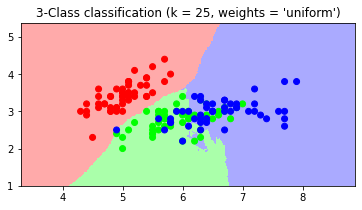

In [6]:
k = 25   # how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

**Answer 2** All point would be at exact same place the difference is the boundaries of each class(change in area of color where next would reside). The class boundaries has become more smoother.
The blue class in the green class part has become very less compared to K=3.

**Queston 3**. In the line that creates `clf` change weights='uniform' to weights='distance'. Check the documentation or google to understand what it means. Explain. Run the code and discuss if you see any difference.

C:\Users\Dhruv\AppData\Local\Temp/ipykernel_34304/2327443313.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


<Figure size 432x288 with 0 Axes>

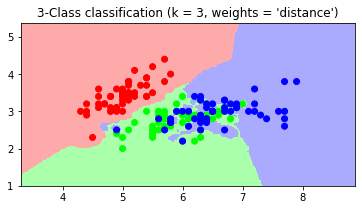

In [7]:
k = 3   # how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'distance'))
plt.show()

**Answer 3:**'uniform' : uniform weights.  All points in each neighborhood are weighted equally.
'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a    greater influence than neighbors which are further away.
The boundary of class are distributed evenly(equal distance) if any point is there. As we can the red point(4.5,3.5), we can see the distribution of boundary like a arc around red point in this graph while it was not evenly distributed and was very close.

**Question 4**. Take a look at the code and try to understand what each line of the code does. Explain each line of code.

C:\Users\Dhruv\AppData\Local\Temp/ipykernel_34304/1160172663.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light) #Plotting colormap with boundary


<Figure size 432x288 with 0 Axes>

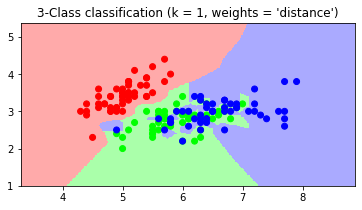

In [8]:
#Answer 4**
k = 1   # Total number of points(k) is used to find nearest neighbour when new point is introduced anywhere.

X = iris.data[:, [0,1]]  # X is set to first two features/columns of iris dataset.
y = iris.target #Y is set as target value(0,1,2)

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) #Color map labels for boundary of different colors like Sundown, MintGreen, Perano 
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF']) #Color map labels for points of different colors like Red, Lime, Blue


clf = neighbors.KNeighborsClassifier(k, weights='uniform') #Creating KNN algorithm with n=1 and weights is uniform
clf.fit(X, y) #Fit KNN classifier from train data


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #Finding Maximum and Minimum points of X in the mesh.
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 #Finding Maximum and Minimum points of Y in the mesh.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h)) #Creating meshgrid 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #Predict the class labels for the provided data.


Z = Z.reshape(xx.shape) #Reshaping Z into which it will be usable. From 1D to 2D here. From 61600 to (220,280)
plt.figure() #plotting figure
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light) #Plotting colormap with boundary


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold) #Plotting points on color map
plt.xlim(xx.min(), xx.max()) #Plotting X axis
plt.ylim(yy.min(), yy.max()) #Plotting Y axis
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'distance')) #Title of Plot
plt.show() #Showing final figure

### Training and testing
  As mentioned above, the typical mechanism for testing accuracy of a `predictor` is to split the data randomly into training and testing, train `predictor` on training data and test its performance on test data. Let us see how it can be done.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

**Question 5**. What is the size of the resulting objects?

Now that we created training and test sets, we can train a kNN classifier using the training data. Before moving forward, let us take a second and take a look at the documentation for kNN implementation in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Let us train the kNN predictor:

In [10]:
print(X_train.shape)
print(X_test.shape)

(100, 2)
(50, 2)


In [11]:
#from sklearn.neighbors import KNeighborsClassifier
k = 1   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
print(predictor)

KNeighborsClassifier(n_neighbors=1)


Now that we trained `predictor` we can use it to provide predictions on any example `x`. 

In [12]:
# select the first 4 test examples
i = [0,1,2,3]
x = X_test[i,:]
print(x)
# predict its label
yhat = predictor.predict(x)
# compare predicted and true labels
print(np.array(zip(yhat,y_test[i])))

[[7.9 3.8]
 [6.4 3.2]
 [7.2 3. ]
 [4.9 3. ]]


**Question 6**. Did your kNN predictor do a good job in predicting labels of the first 4 test examples? 

In [13]:
yhat

array([2, 2, 2, 0])

In [14]:
y_test[:4]

array([2, 1, 2, 0])

By comparing above two value, We can say it was able to predict 3 correct from given 4.

**Question 7**. Write a piece of code that calculates the accuracy on those 4 test examples (number of correct guesses divided by the total number of guesses

In [15]:
## Question 7
def acc(yhat,y_test):
    right = 0
    for i in range(len(yhat)):
        if yhat[i] == y_test[i]:
            right = right + 1
    per=right/len(yhat)
    return per
acc(yhat,y_test[i])

0.75

**Question 8**. Find the predictions on all test examples in `X_test` and calculate the accuracy using your code from *Question 7*.

In [16]:
## Question 8
yhat_all = predictor.predict(X_test)
def acc(yhat,y_test):
    right = 0
    for i in range(len(yhat)):
        if yhat[i] == y_test[i]:
            right += 1
    per=right/len(yhat)
    print(right)
    print(len(yhat))
    return per
acc(yhat_all,y_test)

39
50


0.78

**Question 9.** Train predictor using different choices of k. Try  𝑘=1,3,5,15,25,50 . Report the accuracies on the test data (you can use the score method). Which choice of  𝑘  resulted in the highest accuracy? Comment briefly if the results make sense to you.

In [17]:
k = 1   
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print(f"For k={k} accuracy is:{accuracy}")

k = 3   
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print(f"For k={k} accuracy is:{accuracy}")

k = 5   
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print(f"For k={k} accuracy is:{accuracy}")

k = 15   
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print(f"For k={k} accuracy is:{accuracy}")

k = 25   
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print(f"For k={k} accuracy is:{accuracy}")

k = 50   
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print(f"For k={k} accuracy is:{accuracy}")

For k=1 accuracy is:0.78
For k=3 accuracy is:0.78
For k=5 accuracy is:0.78
For k=15 accuracy is:0.78
For k=25 accuracy is:0.78
For k=50 accuracy is:0.82


For k=5,15 gives the highest accuracy.
To some extent if k value is increased than accuracy also increased but K=50 does not have good accuarcy as we only have X_test as 50 so it become same as datset test.

**Question 10.** Other than choice of  𝑘 , KNeighborsClassifier allows you to make some other choices. For example, in Question 3 you saw that you can use a weighted prediction. There are few other options. Study the documentation and summarize in few sentences what other options you have when training the kNN classifier.

The attribute which can be changed other than K are
1. **'weights'**-It signifies how weight should be distributed between neighbor values.
2. **'algorithm'**-It signifies the algorithm that will be used to compute nearest neighbors. 
3. **'metric'**-Metric is used for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p = 2.
4. **'p'**-Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

**Question 11.** Train kNN classifier on a different pair of features of your choice. Use  𝑘  of your choice and feel free to keep other choices at their default values. Which pair of features results in higher accuracy?

In [18]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33)
for i in range(3):
    for j in range(i+1,4):
        predictor = neighbors.KNeighborsClassifier(n_neighbors = 5)
        predictor.fit(X_train[:,[i,j]], y_train);
        acc = predictor.score(X_test[:,[i,j]],y_test)
        print(f"For {i} {j} Accuracy= {acc}")

For 0 1 Accuracy= 0.76
For 0 2 Accuracy= 0.86
For 0 3 Accuracy= 0.88
For 1 2 Accuracy= 0.92
For 1 3 Accuracy= 0.92
For 2 3 Accuracy= 0.96


Here 0= Sepal Length, 1= Sepal Width, 2= Petal Length 3= Petal Width

Highest Accuracy is for "Sepal Length and Petal Length", "Sepal Length and Petal Width" and "Petal Length and Petal Width"

**Question 12.** Train kNN classifier using all 4 features. Report the accuracy on test data set. Play with parameters of kNN to try to find a combination that results in the highest accuracy. Can you find something that works better than  𝑘=3  and default choices?

In [31]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33)
predictor = neighbors.KNeighborsClassifier(n_neighbors = 3)
predictor.fit(X_train, y_train);
acc = predictor.score(X_test,y_test)
print(acc)

0.98


In [39]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33)
predictor = neighbors.KNeighborsClassifier(n_neighbors = 5,weights="uniform", p=2)
predictor.fit(X_train, y_train);
acc = predictor.score(X_test,y_test)
print(acc)

0.98


In [30]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33)
predictor = neighbors.KNeighborsClassifier(n_neighbors = 3,weights="uniform", p=1)
predictor.fit(X_train, y_train);
acc = predictor.score(X_test,y_test)
print(acc)

0.98


When default k=3, the accuracy is 0.98

After trying various version I found out that when 'k=5, weights="uniform", p=2' and 'k = 3,weights="uniform", p=1' achieved 0.98 and 

## Part B: Write your own function for kNN (50% of the score)

**Question 13** Write a function for k-nearest neighbor (k-NN) classification of the form `accuracy = knnC(X_test, y_test, X_train, y_train, k)`, where k is the number of nearest neighbors. Assume the Euclidean distance. So, the inputs are training and test data and the output should be accuracy on test data. Repeat **Question 9** using your function. Check if the results are the same.
**NOTE:** I know that you can find python code for this on Web. However, I specifically ask you to write this function on your own and not use anybody's help. This is one of the rare ML algorithms that can be quickly implemented. I think you will learn a lot from this experience that will be very useful for the remainder of this course.


In [22]:
from collections import Counter

In [23]:
from collections import Counter
def Euclidean_distance(row1, row2):
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2            #(x1-x2)**2+(y1-y2)**2
    return ((distance)**0.5)

In [24]:
def knnC(X_test, y_test, X_train, y_train, k):
    
    y_pred=[]

    for i in range(len(X_test)):
        distance=[]
        data=[]
        for j in range(len(X_train)):
            dist=Euclidean_distance(X_test[i], X_train[j]) #Finding euclidean distance
            distance.append(dist)
            data.append(y_train[j])
    #Sorting data
        for m in range(k):
            for n in range(m+1,len(distance)):
                if distance[m]>distance[n]:
                    d=distance[m]
                    l=data[m]
                    distance[m]=distance[n]
                    data[m]=data[n]
                    distance[n]=d
                    data[n]=l
        
        c = Counter(data[0:k])
        value,count=c.most_common()[0]
        y_pred.append(value)
       
    #Calculating Accuracy
    right=0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            right+=1
    
    accuracy=right/len(y_test)
    return accuracy
            

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
accu = knnC(X_test, y_test, X_train, y_train, 1)
print(f"For k=1 Accuracy is: {accu}")
accu = knnC(X_test, y_test, X_train, y_train, 3)
print(f"For k=3 Accuracy is: {accu}")
accu = knnC(X_test, y_test, X_train, y_train, 5)
print(f"For k=5 Accuracy is: {accu}")
accu = knnC(X_test, y_test, X_train, y_train, 15)
print(f"For k=15 Accuracy is: {accu}")
accu = knnC(X_test, y_test, X_train, y_train, 25)
print(f"For k=25 Accuracy is: {accu}")
accu = knnC(X_test, y_test, X_train, y_train, 50)
print(f"For k=50 Accuracy is: {accu}")

For k=1 Accuracy is: 0.54
For k=3 Accuracy is: 0.64
For k=5 Accuracy is: 0.7
For k=15 Accuracy is: 0.68
For k=25 Accuracy is: 0.7
For k=50 Accuracy is: 0.64


In [26]:
k = 1   
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print(f"For k={k} Accuracy is:{accuracy}")

k = 3   
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print(f"For k={k} Accuracy is:{accuracy}")

k = 5   
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print(f"For k={k} Accuracy is:{accuracy}")

k = 15   
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print(f"For k={k} Accuracy is:{accuracy}")

k = 25   
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print(f"For k={k} Accuracy is:{accuracy}")

k = 50   
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print(f"For k={k} Accuracy is:{accuracy}")

For k=1 Accuracy is:0.64
For k=3 Accuracy is:0.68
For k=5 Accuracy is:0.7
For k=15 Accuracy is:0.7
For k=25 Accuracy is:0.76
For k=50 Accuracy is:0.7


Results are not same. The accuracy with my program differs by 0.10 in k=1, 0.04 when k=3, 0.02 when k=15, 0.06 when k=50 and for k=10 and k=15 both are same